# Laboratory 9

# 1) Find the best and worst cases for the Gale-Shapley and Irving Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy


In [ ]:
N = 4
  
# This function returns true if  
# woman 'w' prefers man 'm1' over man 'm' 
def wPrefersM1OverM(prefer, w, m, m1): 
      
    # Check if w prefers m over her  
    # current engagment m1 
    for i in range(N): 
          
        # If m1 comes before m in lisr of w,  
        # then w prefers her current engagement, 
        # don't do anything 
        if (prefer[w][i] == m1): 
            return True
  
        # If m cmes before m1 in w's list,  
        # then free her current engagement  
        # and engage her with m 
        if (prefer[w][i] == m): 
            return False
  
# Prints stable matching for N boys and N girls.  
# Boys are numbered as 0 to N-1.  
# Girls are numbereed as N to 2N-1. 
def stableMarriage(prefer): 
      
    # Stores partner of women. This is our output  
    # array that stores paing information.  
    # The value of wPartner[i] indicates the partner  
    # assigned to woman N+i. Note that the woman numbers  
    # between N and 2*N-1. The value -1 indicates  
    # that (N+i)'th woman is free 
    wPartner = [-1 for i in range(N)] 
  
    # An array to store availability of men.  
    # If mFree[i] is false, then man 'i' is free, 
    # otherwise engaged. 
    mFree = [False for i in range(N)] 
  
    freeCount = N 
  
    # While there are free men 
    while (freeCount > 0): 
          
        # Pick the first free man (we could pick any) 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
  
        # One by one go to all women according to  
        # m's preferences. Here m is the picked free man 
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
  
            # The woman of preference is free,  
            # w and m become partners (Note that  
            # the partnership maybe changed later).  
            # So we can say they are engaged not married 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                  
                # If w is not free 
                # Find current engagement of w 
                m1 = wPartner[w - N] 
  
                # If w prefers m over her current engagement m1, 
                # then break the engagement between w and m1 and 
                # engage m with w. 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
  
            # End of Else 
        # End of the for loop that goes  
        # to all women in m's list 
    # End of main while loop 
  
    # Prthe solution 
    #print("Woman ", " Man") 
    #for i in range(N): 
        #print(i + N, "\t", wPartner[i])
    

In [ ]:
#Same Function, but printing the stable marriage
def stableMarriage2(prefer): 
      
    # Stores partner of women. This is our output  
    # array that stores paing information.  
    # The value of wPartner[i] indicates the partner  
    # assigned to woman N+i. Note that the woman numbers  
    # between N and 2*N-1. The value -1 indicates  
    # that (N+i)'th woman is free 
    wPartner = [-1 for i in range(N)] 
  
    # An array to store availability of men.  
    # If mFree[i] is false, then man 'i' is free, 
    # otherwise engaged. 
    mFree = [False for i in range(N)] 
  
    freeCount = N 
  
    # While there are free men 
    while (freeCount > 0): 
          
        # Pick the first free man (we could pick any) 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
  
        # One by one go to all women according to  
        # m's preferences. Here m is the picked free man 
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
  
            # The woman of preference is free,  
            # w and m become partners (Note that  
            # the partnership maybe changed later).  
            # So we can say they are engaged not married 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                  
                # If w is not free 
                # Find current engagement of w 
                m1 = wPartner[w - N] 
  
                # If w prefers m over her current engagement m1, 
                # then break the engagement between w and m1 and 
                # engage m with w. 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
  
            # End of Else 
        # End of the for loop that goes  
        # to all women in m's list 
    # End of main while loop 
  
    # Prthe solution 
    print("Woman ", " Man") 
    for i in range(N): 
        print(i + N, "\t", wPartner[i])

For n=N

Boys are numbered as 0 to N-1.  
Girls are numbereed as N to 2N-1. 

For Example:

In [ ]:
preferBoys = [[7, 5, 6, 4], [5, 4, 6, 7], 
          [4, 5, 6, 7], [4, 5, 6, 7]]
preferGirls=[[0, 1, 2, 3], [0, 1, 2, 3], 
          [0, 1, 2, 3], [0, 1, 2, 3]]
  
stableMarriage(preferBoys+preferGirls) 

Woman   Man
4 	 2
5 	 1
6 	 3
7 	 0


# N=4

To find the best and worst case, we will make the preferences random, executing the algorithm 1000 times and taking the 3 best execution times and the 3 worst execution times, for N=4

In [ ]:
from random import sample
from time import time
N=4
man = range(0,4)
woman=range(4,8)
timer=[0,0,0,0,0,0]
prefer=[0,0,0,0,0,0]
for i in range(1000):
  preferBoys = [sample(woman,k=4),sample(woman,k=4),sample(woman,k=4),sample(woman,k=4)]
  
  preferGirls = [sample(man,k=4),sample(man,k=4),sample(man,k=4),sample(man,k=4)]
  time_in = time() 
  stableMarriage(preferBoys+preferGirls)
  time_fn = time()
  if (i<5):
    timer[i]=(time_fn-time_in)
    prefer[i]=(preferBoys+preferGirls)
  else :
    j=0
    while j<3:
      if ((time_fn-time_in)<timer[j]):
        timer[j]=time_fn-time_in
        prefer[j]=preferBoys+preferGirls
        break
      if ((time_fn-time_in)>timer[j+3]):
        timer[j+3]=time_fn-time_in
        prefer[j+3]=preferBoys+preferGirls
        break
      j+=1
print(timer)
print(prefer)


[3.814697265625e-06, 3.814697265625e-06, 3.814697265625e-06, 0.000835418701171875, 0.0003075599670410156, 0.00011014938354492188]
[[[4, 6, 7, 5], [6, 4, 7, 5], [7, 6, 4, 5], [5, 6, 4, 7], [2, 1, 3, 0], [2, 0, 3, 1], [3, 0, 1, 2], [2, 1, 0, 3]], [[4, 6, 5, 7], [7, 6, 5, 4], [6, 7, 4, 5], [5, 6, 4, 7], [3, 1, 2, 0], [3, 2, 0, 1], [3, 0, 2, 1], [0, 1, 3, 2]], [[7, 4, 5, 6], [6, 5, 4, 7], [5, 4, 6, 7], [4, 7, 5, 6], [0, 3, 2, 1], [0, 3, 1, 2], [0, 2, 3, 1], [3, 1, 0, 2]], [[5, 6, 4, 7], [7, 6, 5, 4], [6, 5, 7, 4], [7, 5, 6, 4], [1, 2, 0, 3], [2, 0, 3, 1], [0, 1, 3, 2], [3, 1, 0, 2]], [[6, 4, 5, 7], [7, 4, 6, 5], [4, 5, 6, 7], [5, 4, 6, 7], [3, 1, 0, 2], [0, 2, 3, 1], [0, 2, 1, 3], [0, 1, 3, 2]], [[7, 4, 5, 6], [4, 6, 7, 5], [4, 7, 5, 6], [5, 4, 6, 7], [1, 3, 0, 2], [1, 0, 3, 2], [3, 0, 1, 2], [2, 0, 1, 3]]]


## Top 3, Best execution times for N=4

In [ ]:
print(timer[0])
preferMens=prefer[0][:N]
preferGirls=prefer[0][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[0])
%time


3.814697265625e-06
PreferBoys =  [[4, 6, 7, 5], [6, 4, 7, 5], [7, 6, 4, 5], [5, 6, 4, 7]]
PreferGirls =  [[2, 1, 3, 0], [2, 0, 3, 1], [3, 0, 1, 2], [2, 1, 0, 3]]
Woman   Man
4 	 0
5 	 3
6 	 1
7 	 2
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


In [ ]:
print(timer[1])
preferMens=prefer[1][:N]
preferGirls=prefer[1][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[1])
%time

3.814697265625e-06
PreferBoys =  [[4, 6, 5, 7], [7, 6, 5, 4], [6, 7, 4, 5], [5, 6, 4, 7]]
PreferGirls =  [[3, 1, 2, 0], [3, 2, 0, 1], [3, 0, 2, 1], [0, 1, 3, 2]]
Woman   Man
4 	 0
5 	 3
6 	 2
7 	 1
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


In [ ]:
print(timer[2])
preferMens=prefer[2][:N]
preferGirls=prefer[2][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[2])
%time

3.814697265625e-06
PreferBoys =  [[7, 4, 5, 6], [6, 5, 4, 7], [5, 4, 6, 7], [4, 7, 5, 6]]
PreferGirls =  [[0, 3, 2, 1], [0, 3, 1, 2], [0, 2, 3, 1], [3, 1, 0, 2]]
Woman   Man
4 	 3
5 	 2
6 	 1
7 	 0
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs


## Top 3, Worst execution times for N=4

In [ ]:
print(timer[3])
preferMens=prefer[3][:N]
preferGirls=prefer[3][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[3])
%time

0.000835418701171875
PreferBoys =  [[5, 6, 4, 7], [7, 6, 5, 4], [6, 5, 7, 4], [7, 5, 6, 4]]
PreferGirls =  [[1, 2, 0, 3], [2, 0, 3, 1], [0, 1, 3, 2], [3, 1, 0, 2]]
Woman   Man
4 	 1
5 	 2
6 	 0
7 	 3
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [ ]:
print(timer[4])
preferMens=prefer[4][:N]
preferGirls=prefer[4][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[4])
%time

0.0003075599670410156
PreferBoys =  [[6, 4, 5, 7], [7, 4, 6, 5], [4, 5, 6, 7], [5, 4, 6, 7]]
PreferGirls =  [[3, 1, 0, 2], [0, 2, 3, 1], [0, 2, 1, 3], [0, 1, 3, 2]]
Woman   Man
4 	 2
5 	 3
6 	 0
7 	 1
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [ ]:
print(timer[5])
preferMens=prefer[5][:N]
preferGirls=prefer[5][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[5])
%time

0.00011014938354492188
PreferBoys =  [[7, 4, 5, 6], [4, 6, 7, 5], [4, 7, 5, 6], [5, 4, 6, 7]]
PreferGirls =  [[1, 3, 0, 2], [1, 0, 3, 2], [3, 0, 1, 2], [2, 0, 1, 3]]
Woman   Man
4 	 1
5 	 0
6 	 3
7 	 2
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


# N=40

To find the best and worst case, we will make the preferences random, executing the algorithm 1000 times and taking the 3 best execution times and the 3 worst execution times, for N=40

In [4]:
N = 40
def wPrefersM1OverM(prefer, w, m, m1):   
    for i in range(N):
        if (prefer[w][i] == m1): 
            return True
        if (prefer[w][i] == m): 
            return False

def stableMarriage(prefer):   
    wPartner = [-1 for i in range(N)]   
    mFree = [False for i in range(N)]   
    freeCount = N
     
    while (freeCount > 0):
        
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1  
            else:              
                m1 = wPartner[w - N] 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
    
def stableMarriage2(prefer):   
    wPartner = [-1 for i in range(N)]   
    mFree = [False for i in range(N)]   
    freeCount = N     
    while (freeCount > 0): 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1  
            else:              
                m1 = wPartner[w - N] 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
    print("Woman ", " Man") 
    for i in range(N): 
        print(i + N, "\t", wPartner[i])


In [5]:
from random import sample
from time import time
N=40
man = range(0,40)
woman=range(40,80)
timer=[0,0,0,0,0,0]
prefer=[0,0,0,0,0,0]
for i in range(1000):
  preferBoys = [sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40)]
  
  preferGirls = [sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40)]
  time_in = time() 
  stableMarriage(preferBoys+preferGirls)
  time_fn = time()
  if (i<5):
    timer[i]=(time_fn-time_in)
    prefer[i]=(preferBoys+preferGirls)
  else :
    j=0
    while j<3:
      if ((time_fn-time_in)<timer[j]):
        timer[j]=time_fn-time_in
        prefer[j]=preferBoys+preferGirls
        break
      if ((time_fn-time_in)>timer[j+3]):
        timer[j+3]=time_fn-time_in
        prefer[j+3]=preferBoys+preferGirls
        break
      j+=1
print(timer)
print(prefer)

[0.000225067138671875, 0.0002353191375732422, 0.00025272369384765625, 0.0011739730834960938, 0.0010037422180175781, 0.0009512901306152344]
[[[52, 73, 47, 43, 59, 40, 72, 64, 75, 74, 68, 71, 44, 70, 51, 69, 67, 62, 55, 77, 76, 61, 79, 58, 46, 56, 65, 48, 63, 54, 53, 60, 45, 78, 50, 66, 49, 42, 41, 57], [45, 65, 60, 67, 68, 58, 54, 50, 69, 42, 57, 62, 66, 59, 51, 70, 74, 40, 76, 43, 49, 75, 47, 41, 56, 72, 79, 77, 52, 78, 71, 63, 48, 55, 73, 53, 46, 61, 44, 64], [63, 40, 41, 79, 56, 44, 64, 53, 54, 74, 73, 60, 45, 48, 47, 42, 71, 66, 78, 59, 67, 69, 58, 76, 46, 70, 43, 72, 62, 51, 52, 49, 55, 65, 50, 61, 77, 68, 57, 75], [51, 77, 72, 57, 78, 43, 75, 64, 60, 61, 73, 59, 76, 46, 48, 74, 79, 69, 44, 52, 70, 65, 40, 63, 71, 58, 68, 42, 54, 45, 53, 49, 41, 62, 66, 47, 55, 56, 50, 67], [51, 64, 58, 43, 47, 50, 55, 70, 77, 68, 66, 61, 48, 54, 65, 45, 42, 40, 49, 74, 52, 59, 71, 69, 60, 76, 73, 78, 57, 72, 46, 56, 75, 79, 41, 67, 63, 62, 53, 44], [66, 48, 79, 42, 56, 72, 71, 63, 44, 74, 55, 78, 

## Top 3, Best execution times for N=40

In [6]:
print(timer[0])
preferMens=prefer[0][:N]
preferGirls=prefer[0][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[0])
%time

0.000225067138671875
PreferBoys =  [[52, 73, 47, 43, 59, 40, 72, 64, 75, 74, 68, 71, 44, 70, 51, 69, 67, 62, 55, 77, 76, 61, 79, 58, 46, 56, 65, 48, 63, 54, 53, 60, 45, 78, 50, 66, 49, 42, 41, 57], [45, 65, 60, 67, 68, 58, 54, 50, 69, 42, 57, 62, 66, 59, 51, 70, 74, 40, 76, 43, 49, 75, 47, 41, 56, 72, 79, 77, 52, 78, 71, 63, 48, 55, 73, 53, 46, 61, 44, 64], [63, 40, 41, 79, 56, 44, 64, 53, 54, 74, 73, 60, 45, 48, 47, 42, 71, 66, 78, 59, 67, 69, 58, 76, 46, 70, 43, 72, 62, 51, 52, 49, 55, 65, 50, 61, 77, 68, 57, 75], [51, 77, 72, 57, 78, 43, 75, 64, 60, 61, 73, 59, 76, 46, 48, 74, 79, 69, 44, 52, 70, 65, 40, 63, 71, 58, 68, 42, 54, 45, 53, 49, 41, 62, 66, 47, 55, 56, 50, 67], [51, 64, 58, 43, 47, 50, 55, 70, 77, 68, 66, 61, 48, 54, 65, 45, 42, 40, 49, 74, 52, 59, 71, 69, 60, 76, 73, 78, 57, 72, 46, 56, 75, 79, 41, 67, 63, 62, 53, 44], [66, 48, 79, 42, 56, 72, 71, 63, 44, 74, 55, 78, 76, 57, 64, 60, 65, 51, 70, 49, 47, 67, 68, 52, 69, 59, 41, 50, 73, 61, 58, 53, 54, 62, 77, 40, 46, 75, 4

In [7]:
print(timer[1])
preferMens=prefer[1][:N]
preferGirls=prefer[1][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[1])
%time

0.0002353191375732422
PreferBoys =  [[73, 44, 41, 59, 51, 66, 61, 47, 71, 79, 65, 48, 69, 68, 57, 70, 64, 75, 62, 67, 58, 76, 78, 72, 60, 46, 40, 56, 45, 74, 42, 50, 54, 77, 49, 52, 55, 63, 53, 43], [43, 60, 48, 58, 56, 75, 57, 47, 74, 76, 62, 44, 79, 51, 70, 59, 72, 63, 65, 49, 55, 50, 42, 54, 40, 46, 64, 68, 71, 66, 53, 52, 77, 78, 69, 73, 41, 45, 61, 67], [64, 52, 58, 61, 62, 60, 40, 44, 49, 57, 53, 78, 45, 72, 67, 71, 79, 56, 75, 66, 63, 55, 47, 42, 43, 70, 74, 73, 77, 65, 68, 76, 41, 48, 69, 54, 51, 59, 46, 50], [41, 68, 63, 72, 79, 69, 54, 45, 76, 75, 48, 64, 59, 46, 65, 57, 60, 74, 44, 42, 51, 61, 40, 53, 58, 49, 55, 43, 50, 70, 52, 73, 78, 67, 56, 47, 66, 71, 77, 62], [55, 51, 40, 61, 71, 69, 62, 78, 53, 46, 75, 48, 70, 74, 42, 50, 44, 72, 77, 63, 67, 49, 57, 59, 56, 47, 73, 58, 64, 76, 45, 66, 65, 43, 54, 79, 60, 68, 41, 52], [42, 74, 71, 76, 52, 60, 69, 50, 75, 78, 70, 66, 56, 51, 54, 65, 57, 58, 40, 77, 44, 61, 63, 79, 73, 53, 72, 62, 67, 68, 55, 48, 43, 49, 45, 59, 47, 41, 

In [8]:
print(timer[2])
preferMens=prefer[2][:N]
preferGirls=prefer[2][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[2])
%time

0.00025272369384765625
PreferBoys =  [[45, 40, 67, 78, 66, 47, 61, 70, 50, 69, 73, 43, 71, 52, 59, 42, 56, 41, 77, 51, 74, 62, 72, 75, 46, 76, 65, 63, 79, 53, 48, 44, 60, 64, 57, 68, 49, 58, 55, 54], [47, 58, 60, 66, 49, 41, 53, 68, 72, 74, 77, 51, 65, 75, 44, 63, 43, 46, 40, 48, 45, 42, 52, 59, 64, 78, 56, 50, 57, 54, 70, 71, 61, 55, 76, 69, 73, 67, 79, 62], [41, 57, 61, 53, 48, 63, 45, 43, 64, 69, 54, 79, 46, 56, 62, 70, 59, 76, 66, 78, 42, 51, 73, 50, 67, 65, 68, 75, 55, 58, 44, 40, 72, 74, 49, 52, 77, 47, 71, 60], [41, 66, 63, 60, 67, 78, 54, 52, 46, 43, 57, 74, 48, 70, 76, 49, 47, 59, 68, 65, 75, 62, 45, 55, 77, 50, 61, 40, 72, 71, 79, 53, 42, 56, 73, 44, 64, 51, 58, 69], [76, 51, 65, 61, 41, 48, 46, 72, 79, 52, 62, 66, 70, 44, 47, 60, 67, 64, 45, 55, 73, 49, 54, 71, 43, 69, 57, 50, 77, 59, 63, 40, 42, 75, 58, 53, 68, 78, 74, 56], [44, 55, 79, 64, 65, 46, 76, 59, 49, 53, 60, 48, 63, 58, 61, 72, 51, 75, 43, 42, 40, 41, 57, 56, 45, 66, 71, 74, 62, 77, 69, 50, 78, 54, 68, 47, 67, 70,

## Top 3, Worst execution times for N=40

In [9]:
print(timer[3])
preferMens=prefer[3][:N]
preferGirls=prefer[3][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[3])
%time

0.0011739730834960938
PreferBoys =  [[56, 78, 67, 52, 60, 54, 41, 71, 61, 70, 42, 51, 75, 47, 43, 40, 66, 68, 64, 73, 53, 46, 62, 77, 50, 76, 57, 44, 79, 55, 72, 48, 63, 45, 69, 58, 49, 59, 65, 74], [44, 70, 63, 62, 76, 66, 79, 41, 65, 53, 59, 61, 58, 46, 47, 73, 77, 60, 72, 74, 69, 55, 54, 68, 75, 48, 43, 64, 42, 52, 51, 67, 40, 71, 45, 50, 56, 78, 49, 57], [63, 40, 47, 49, 54, 48, 74, 61, 53, 60, 52, 73, 78, 71, 76, 59, 67, 58, 41, 77, 51, 55, 72, 75, 66, 69, 45, 64, 50, 56, 65, 57, 68, 62, 44, 42, 79, 46, 70, 43], [47, 52, 55, 51, 48, 78, 46, 63, 61, 41, 67, 45, 62, 56, 54, 40, 75, 60, 57, 44, 74, 73, 77, 66, 69, 76, 65, 59, 79, 42, 43, 68, 50, 53, 71, 72, 49, 64, 70, 58], [71, 51, 73, 76, 79, 47, 46, 54, 57, 78, 44, 43, 63, 40, 77, 61, 49, 68, 60, 70, 66, 55, 56, 65, 69, 50, 75, 41, 64, 53, 67, 72, 74, 45, 59, 58, 42, 48, 52, 62], [71, 70, 41, 73, 51, 76, 57, 78, 45, 67, 42, 74, 58, 63, 72, 40, 79, 77, 68, 75, 62, 43, 55, 49, 53, 66, 48, 50, 54, 69, 56, 61, 60, 44, 52, 47, 65, 59, 

In [10]:
print(timer[4])
preferMens=prefer[4][:N]
preferGirls=prefer[4][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[4])
%time

0.0010037422180175781
PreferBoys =  [[70, 69, 53, 40, 74, 56, 61, 72, 58, 41, 66, 71, 47, 77, 75, 44, 52, 60, 49, 65, 78, 48, 50, 42, 51, 54, 57, 55, 79, 64, 68, 67, 62, 43, 45, 59, 73, 46, 63, 76], [52, 48, 62, 50, 63, 44, 67, 66, 68, 58, 70, 53, 74, 49, 55, 41, 42, 71, 59, 75, 78, 56, 69, 60, 76, 51, 43, 73, 40, 46, 77, 79, 61, 57, 47, 72, 54, 65, 45, 64], [70, 73, 56, 55, 51, 65, 71, 42, 48, 66, 78, 44, 74, 69, 50, 54, 41, 64, 77, 47, 75, 59, 58, 63, 61, 79, 52, 40, 67, 68, 72, 62, 45, 76, 57, 43, 60, 53, 46, 49], [65, 54, 77, 40, 64, 70, 49, 67, 72, 71, 50, 74, 60, 41, 46, 68, 76, 44, 48, 56, 55, 42, 62, 73, 78, 63, 43, 52, 69, 66, 58, 47, 59, 61, 51, 75, 45, 79, 57, 53], [75, 63, 71, 65, 43, 61, 76, 78, 42, 41, 40, 66, 72, 74, 67, 45, 58, 73, 56, 62, 59, 79, 55, 54, 64, 60, 70, 77, 44, 53, 50, 68, 52, 49, 48, 46, 51, 47, 57, 69], [56, 79, 49, 52, 68, 50, 54, 40, 77, 43, 65, 46, 62, 45, 55, 73, 78, 67, 41, 63, 76, 51, 57, 42, 66, 48, 53, 71, 75, 72, 70, 61, 59, 47, 69, 44, 74, 60, 

In [11]:
print(timer[5])
preferMens=prefer[5][:N]
preferGirls=prefer[5][N:]

print("PreferBoys = ",preferMens)
print("PreferGirls = ",preferGirls)
stableMarriage2(prefer[5])
%time

0.0009512901306152344
PreferBoys =  [[70, 51, 62, 74, 46, 42, 71, 57, 41, 54, 75, 43, 61, 55, 63, 76, 66, 65, 72, 68, 45, 52, 77, 59, 58, 56, 50, 64, 73, 79, 44, 49, 60, 78, 48, 53, 67, 69, 40, 47], [40, 44, 60, 50, 52, 70, 45, 54, 47, 49, 74, 41, 64, 72, 58, 61, 67, 66, 56, 73, 65, 46, 78, 55, 51, 62, 79, 69, 68, 77, 76, 59, 75, 53, 63, 42, 43, 71, 48, 57], [61, 74, 77, 76, 44, 75, 71, 68, 54, 59, 57, 40, 79, 46, 72, 42, 53, 63, 66, 64, 47, 41, 50, 58, 45, 55, 56, 78, 69, 49, 70, 48, 60, 51, 62, 43, 65, 73, 52, 67], [61, 60, 70, 58, 68, 78, 66, 51, 48, 56, 55, 79, 45, 62, 77, 74, 54, 75, 73, 42, 72, 69, 57, 46, 50, 53, 64, 67, 63, 47, 49, 44, 71, 41, 59, 40, 52, 76, 43, 65], [56, 47, 79, 73, 67, 46, 45, 71, 44, 51, 66, 55, 62, 59, 65, 76, 72, 60, 57, 50, 78, 43, 53, 75, 61, 74, 70, 49, 40, 68, 54, 63, 64, 48, 41, 77, 69, 58, 42, 52], [76, 41, 67, 49, 43, 79, 71, 54, 69, 75, 46, 40, 66, 50, 78, 45, 58, 70, 64, 68, 72, 48, 55, 61, 47, 60, 65, 74, 57, 52, 62, 56, 53, 44, 59, 73, 63, 51, 

# 2) Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [13]:
N = 4
def wPrefersM1OverM(prefer, w, m, m1):   
    for i in range(N):
        if (prefer[w][i] == m1): 
            return True
        if (prefer[w][i] == m): 
            return False

def stableMarriage(prefer):   
    wPartner = [-1 for i in range(N)]   
    mFree = [False for i in range(N)]   
    freeCount = N
    iterator=0  
    while (freeCount > 0):
        iterator+=1
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1  
            else:              
                m1 = wPartner[w - N] 
                if (wPrefersM1OverM(prefer, w, m, m1) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
    return iterator

In [61]:
from random import sample

N=4
man = range(0,4)
woman=range(4,8)
iterator=[]
mean=0
for i in range(100):
  preferBoys = [sample(woman,k=4),sample(woman,k=4),sample(woman,k=4),sample(woman,k=4)]
  
  preferGirls = [sample(man,k=4),sample(man,k=4),sample(man,k=4),sample(man,k=4)]  
  a=stableMarriage(preferBoys+preferGirls)
  mean+=a
  iterator.append(a) 
  
iterator.sort()
print(iterator)
print(mean/100)

N=40
man = range(0,40)
woman=range(40,80)
iterator2=[]
mean2=0
for i in range(100):
  preferBoys = [sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40),sample(woman,k=40)]
  preferGirls = [sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40),sample(man,k=40)]
  a2=stableMarriage(preferBoys+preferGirls)
  mean2+=a2
  iterator2.append(a2) 
  
iterator2.sort()
print(iterator2)
print(mean2/100)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7]
5.05
[54, 56, 56, 59, 59, 60, 61, 62, 64, 64, 64, 65, 65, 66, 68, 68, 68, 68, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 72, 72, 72, 72, 72, 72, 73, 73, 73, 74, 75, 75, 75, 76, 76, 77, 77, 77, 77, 77, 78, 78, 78, 78, 79, 79, 79, 79, 80, 80, 81, 81, 82, 82, 82, 83, 83, 83, 83, 84, 84, 84, 85, 85, 85, 85, 86, 86, 87, 87, 88, 88, 88, 89, 89, 90, 90, 93, 94, 95, 96, 96, 98, 99, 100, 100, 102, 109]
77.66


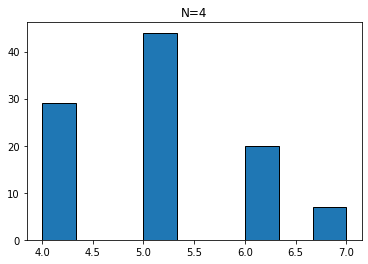

Mean =  5.05


In [73]:
import matplotlib.pyplot as plt

plt.title('N=4')
plt.hist(iterator, bins =9, alpha=1, edgecolor = 'black',  linewidth=1)
#plt.grid(True)
plt.show()
print("Mean = ",mean/100)


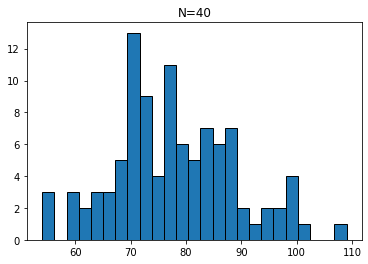

Mean =  77.66


In [72]:
import matplotlib.pyplot as plt

plt.title('N=40')
plt.hist(iterator2 ,bins =25,alpha=1, edgecolor = 'black',  linewidth=1)
#plt.grid(True)
plt.show()
print("Mean = ",mean2/100)
